# Week 11 Seminar Notebook: Training a Softmax Classifier

Today we are going to look again at model training and evaluation, starting by looking briefly at training with the simulated dataset we worked with last week and then applying what we learn to a new real language dataset.





First we need to create the simulated dataset

(0.0, 5.0)

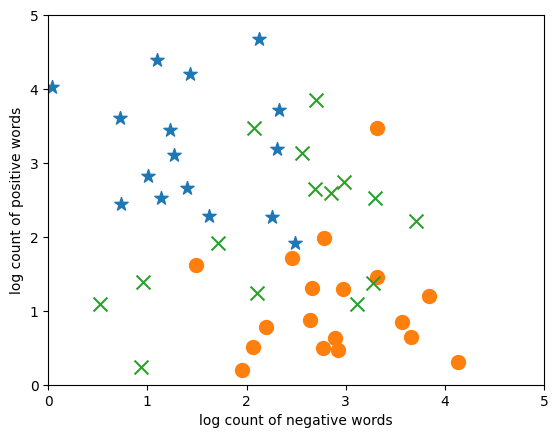

In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Create simulated data
np.random.seed(10)
w1_center = (1, 3)
w2_center = (3, 1)
w3_center = (1, 1)
w4_center = (3, 3)

x=np.concatenate((np.random.normal(loc=w1_center,size=(20,2)),np.random.normal(loc=w2_center,size=(20,2)),np.random.normal(loc=w3_center,size=(10,2)),np.random.normal(loc=w4_center,size=(10,2))))

labs=np.repeat([0,1,2],[20,20,20],axis=0)
y=np.repeat(np.diag((1,1,1)),[20,20,20],axis=0)
x=x.T
x=np.array([x[0],x[1],[1] * len(x[0])])

plt.scatter(x[0][labs==0], x[1][labs==0], marker='*', s=100)
plt.scatter(x[0][labs==1], x[1][labs==1], marker='o', s=100)
plt.scatter(x[0][labs==2], x[1][labs==2], marker='x', s=100)
plt.xlabel("log count of negative words")
plt.ylabel("log count of positive words")
plt.xlim((0,5))
plt.ylim((0,5))


The input matrix x has the following shape:

In [ ]:
x.shape

This is a matrix with 3 rows (the input features including the dummy row of ones for the bias node) with 60 columns - one for each data points. So each column is paired with a target outcome value in y

In [ ]:
y.shape

The following code trains a multiclass classifier to convergence.  Note that before I run it I am going to transpose the matrix so that it has 60 rows and 3 columns as this will be easier to deal with.

In [ ]:
x=x.T
x.shape

In [ ]:
np.random.seed(10)
n_iters = 1000
num_features=3
num_classes=3
num_samples = len(y)
weights = np.random.rand(num_classes,num_features)
lr=0.2
logistic_loss=[]
z=np.zeros((num_samples,num_classes))
q=np.zeros((num_samples,num_classes))

for i in range(n_iters):

    z= x.dot(weights)
    z_sum=np.exp(z).sum(axis=1)
    q=np.array([list(np.exp(z_i)/z_sum[i]) for i, z_i in enumerate(z)])
    #print(q)
    loss=np.mean(-np.log2((np.sum((y*q),axis=1))))

    logistic_loss.append(loss)

    dw=x.T.dot((q-y))/num_samples
    weights=(weights - (dw*lr))

plt.plot(range(1,n_iters),logistic_loss[1:])
plt.xlabel("number of epochs")
plt.ylabel("loss")

In the following block I am going to make a slight adjustment to the code, so that it uses batch training - instead of updating my weights after each full pass through the data I am going to break the data up into equally sized batches and update the weights after each pass through each batch.

In [ ]:
np.random.seed(10)
n_iters = 1000
num_features=3
num_classes=3
num_samples = len(y)
weights = np.random.rand(num_classes,num_features)
lr=0.2
logistic_loss=[]
z=np.zeros((num_samples,num_classes))
q=np.zeros((num_samples,num_classes))

# Create batches
import random
batch_size=12
batch_assignments=[0,1,2,3,4]*batch_size
random.shuffle(batch_assignments)

for i in range(n_iters):
   cumulative_loss = 0.0
   # For each epoch I run through the batches, updating weights each time
   for j in range(int(len(y)/batch_size)):
       input = x[[ind for ind, v in enumerate(batch_assignments) if v == j]]
       targets = y[[ind for ind, v in enumerate(batch_assignments) if v == j]]
       z= input.dot(weights)
       z_sum=np.exp(z).sum(axis=1)
       q=np.array([list(np.exp(z_i)/z_sum[i]) for i, z_i in enumerate(z)])
       #print(q)
       loss=np.mean(-np.log2((np.sum((targets*q),axis=1))))
       cumulative_loss+=loss
       dw=input.T.dot((q-targets))/num_samples
       weights=(weights - (dw*lr))
   logistic_loss.append(cumulative_loss)
plt.plot(range(1,n_iters),logistic_loss[1:])
plt.xlabel("number of epochs")
plt.ylabel("loss")

## Building an intent classifier

Below you can find data for the task of intent classification. This is a step in task-based dialogue systems - given a particular piece of input from the speaker, the system tries to determine what goal the speaker is trying to achieve, in order that it can then produce an appropriate response.

The data set pairs 2100 reviews with one of seven different intents:

'PlayMusic', e.g. "play easy listening"  \
'AddToPlaylist' e.g. "please add this song to road trip" \
'RateBook' e.g. "give this novel 5 stars" \
'SearchScreeningEvent' e.g. "give me a list of local movie times" \
'BookRestaurant' e.g. "i'd like a table for four at 7pm at Asti" \
'GetWeather' e.g. "what's it like outside" \
'SearchCreativeWork' "show me the new James Bond trailer"

To import the data a prepare it for training please run the following cell.


In [2]:
! wget https://raw.githubusercontent.com/cbannard/lela60331_24-25/refs/heads/main/intent_classification.csv
# Or in Jupyter
#from urllib.request import urlretrieve
#url = "https://raw.githubusercontent.com/cbannard/lela60331_24-25/refs/heads/main/intent_classification.csv"
#filename="intent_classification.csv"
#urlretrieve(url, filename)

--2025-12-08 14:23:23--  https://raw.githubusercontent.com/cbannard/lela60331_24-25/refs/heads/main/intent_classification.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 130852 (128K) [text/plain]
Saving to: ‘intent_classification.csv’

intent_classificati 100%[===================>] 127.79K  --.-KB/s    in 0.02s   

2025-12-08 14:23:23 (6.00 MB/s) - ‘intent_classification.csv’ saved [130852/130852]



In [3]:
! wget https://raw.githubusercontent.com/cbannard/lela60331_24-25/refs/heads/main/intent_classification.csv
# Or in Jupyter
#from urllib.request import urlretrieve
#url = "https://raw.githubusercontent.com/cbannard/lela60331_24-25/refs/heads/main/intent_classification.csv"
#filename="intent_classification.csv"
#urlretrieve(url, filename)

# Import the data into utterances and labels lists

utterances=[]
labels=[]

with open("intent_classification.csv") as f:
   # iterate over the lines in the file
   for line in f.readlines()[1:]:
        # split the current line into a list of two element - the review and the label
        fields = line.rstrip().split(',')
        # put the current review in the reviews list
        utterances.append(fields[0])
        # put the current sentiment rating in the labels list
        labels.append(fields[1])
## Select vocabulary for inclusion in one-hot representations
from collections import Counter
import re
import numpy as np
# Tokenise the text, turning a list of strings into a list of lists of tokens. We use very naive space-based tokenisation.
tokenized_sents = [re.findall("[^ ]+",txt) for txt in utterances]
# Collapse all tokens into a single list
tokens=[]
for s in tokenized_sents:
      tokens.extend(s)
# Count the tokens in the tokens list. The returns a list of tuples of each token and count
counts=Counter(tokens)
# Sort the tuples. The reverse argument instructs to put most frequent first rather than last (which is the default)
so=sorted(counts.items(), key=lambda item: item[1], reverse=True)
# Extract the list of tokens, by transposing the list of lists so that there is a list of tokens a list of counts and then just selecting the former
so=list(zip(*so))[0]
# Select the firs 5000 words in the list
type_list=so[0:2500]

# Create a 2100 x 2500 matrix of zeros
M = np.zeros((len(utterances), len(type_list)))
#iterate over the reviews
for i, utt in enumerate(utterances):
    # Tokenise the current review:
    tokens = re.findall("[^ ]+",utt)
    # iterate over the words in our type list (the set of 5000 words):
    for j,t in enumerate(type_list):
        # if the current word j occurs in the current review i then set the matrix element at i,j to be one. Otherwise leave as zero.
        if t in tokens:
              M[i,j] = 1

--2025-12-08 14:23:25--  https://raw.githubusercontent.com/cbannard/lela60331_24-25/refs/heads/main/intent_classification.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 130852 (128K) [text/plain]
Saving to: ‘intent_classification.csv.1’

intent_classificati 100%[===================>] 127.79K  --.-KB/s    in 0.02s   

2025-12-08 14:23:25 (5.94 MB/s) - ‘intent_classification.csv.1’ saved [130852/130852]



The data is now a matrix in which each row is a training instance and each column represents the presence or absence of one of the one-hot-coded words.

In [4]:
M.shape

(2100, 2500)

I want to split this into training, development and test data. I first of all select a random sample of 80% of the ints between 0 and the sample size. I then obtain a list of the remaining ints and splits this in half so that 10% of the data is a development set and the last 10% is the test data. These can be used to split the data into training set of 1680, a development set of 210 and a test set of 210.

In [ ]:
train_ints=np.random.choice(len(utterances),int(len(utterances)*0.8),replace=False)
remaining_ints=list(set(range(0,len(utterances))) - set(train_ints))
test_ints=np.random.choice(len(remaining_ints),int(len(remaining_ints)*0.5),replace=False)
dev_ints=list(set(range(0,len(remaining_ints))) - set(test_ints))

I then use these ints to select 3 sets of rows of data, resulting in training, development and test data inputs. I use the same ints to select the targets for each set of training items from the labels array. And finally I one-hot encode these targets.

In [ ]:

### Generate one-hot encoded input matrices for training, development and test
M_train = np.array(M[train_ints,]).T
M_test = np.array(M[test_ints,]).T
M_dev = np.array(M[dev_ints,]).T

unique_labels=list(set(labels))
unique_one_hot=np.diag(np.ones(len(unique_labels)))

labels_train = [labels[i] for i in train_ints]
labels_test = [labels[i] for i in test_ints]
labels_dev = [labels[i] for i in dev_ints]

### Generate one-hot encoded target output matrices for training, development and test
y_train=np.array([list(unique_one_hot[k]) for k in [unique_labels.index(x) for x in labels_train]]).T
y_test=np.array([list(unique_one_hot[k]) for k in [unique_labels.index(x) for x in labels_test]]).T
y_dev=np.array([list(unique_one_hot[k]) for k in [unique_labels.index(x) for x in labels_dev]]).T



Problem 1. Rewrite the code from the simulated data (copied below) so that it trains a softmax classifier for the intent classification task on the training set.

In [ ]:
np.random.seed(10)
n_iters = 1000
num_features=3
num_classes=3
num_samples = len(y)
weights = np.random.rand(num_classes,num_features)
lr=0.2
logistic_loss=[]
z=np.zeros((num_samples,num_classes))
q=np.zeros((num_samples,num_classes))

for i in range(n_iters):

    z= x.dot(weights)
    z_sum=np.exp(z).sum(axis=1)
    q=np.array([list(np.exp(z_i)/z_sum[i]) for i, z_i in enumerate(z)])
    #print(q)
    loss=np.mean(-np.log2((np.sum((y*q),axis=1))))

    logistic_loss.append(loss)

    dw=x.T.dot((q-y))/num_samples
    weights=(weights - (dw*lr))

plt.plot(range(1,n_iters),logistic_loss[1:])
plt.xlabel("number of epochs")
plt.ylabel("loss")

Problem 2. Write code to calculate the multiclass precision and recall using macroaveraging (see week 7 lectures slides pt 2 for a definition). I've made a start for you.

In [ ]:
z = weights.dot(M_test)
z_sum=np.exp(z).sum(axis=1)
q=np.array([list(np.exp(z_i)/z_sum[i]) for i, z_i in enumerate(z)])
y_test_pred=np.argmax(q,axis=0)
y_test_true=np.argmax(y_test,axis=0)

TP=[]
for j in range(7):
 TP.append(np.sum(np.array([int(s == j and y_test_true[i] == j) for i,s in enumerate(y_test_pred)])))


Problem 3: Rewrite the code above so that it calculates precision and recall on the training data and the development data after each epoch and print these out.

Problem 4: Rewrite the intent classification code so that it uses batch training.

One you have completed these problems you can move on to make a start on [this worksheet](https://githubtocolab.com/cbannard/lela60331_25-26/blob/main/LELA60331_Week_11_Worksheet_2.ipynb), which you should make sure to complete before our week 12 seminar:

